In [ ]:
#Final Task

In [1]:
#import lib yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#load dataset
from google.colab import files
uploaded = files.upload()

Saving loan_data_2007_2014.csv to loan_data_2007_2014.csv


In [3]:
dataset = pd.read_csv('loan_data_2007_2014.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#5 First Row
dataset.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.shape

(466285, 75)

In [6]:
dataset.dtypes

Unnamed: 0            int64
id                    int64
member_id             int64
loan_amnt             int64
funded_amnt           int64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 75, dtype: object

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [9]:
drop_col = ['Unnamed: 0', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m']

data = dataset.drop(columns=drop_col, axis=1)

In [10]:
# Check loan status
data.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [11]:
#define values
ambiguous = ['Current', 'In Grace Period']
good_loan =  ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

#drop baris yg berakhiran ambigu
data = data[data.loan_status.isin(ambiguous) == False]

#create kolom baru
data['loan_ending'] = np.where(data['loan_status'].isin(good_loan), 'good', 'risky')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
import seaborn as sns

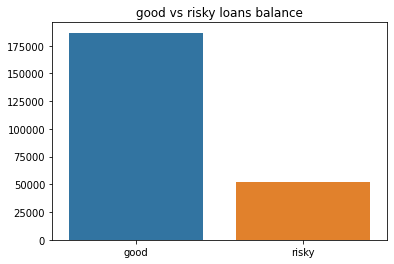

In [14]:
# check the balance
plt.title('good vs risky loans balance')
sns.barplot(x=data.loan_ending.value_counts().index,y=data.loan_ending.value_counts().values)

In [15]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim

In [16]:
leakage_col = ['issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                   'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d']

data.drop(columns=leakage_col, axis=1, inplace=True)

In [17]:
# check duplicated data
data[['loan_amnt','funded_amnt','funded_amnt_inv','grade','sub_grade','desc','purpose','title']]

,loan_amnt,funded_amnt,funded_amnt_inv,grade,sub_grade,desc,purpose,title
0,5000,5000,4975.0,B,B2,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer
1,2500,2500,2500.0,C,C4,Borrower added on 12/22/11 > I plan to use t...,car,bike
2,2400,2400,2400.0,C,C5,NaN,small_business,real estate business
3,10000,10000,10000.0,C,C1,Borrower added on 12/21/11 > to pay for prop...,other,personel
5,5000,5000,5000.0,A,A4,NaN,wedding,My wedding loan I promise to pay back
...,...,...,...,...,...,...,...,...
466276,8525,8525,8525.0,D,D3,NaN,medical,Medical expenses
466277,18000,18000,17975.0,A,A4,Borrower added on 12/09/13 > consolidate all...,debt_consolidation,my loan
466278,10000,10000,10000.0,D,D3,NaN,vacation,Vacation
466281,22000,22000,22000.0,D,D5,NaN,debt_consolidation,Debt consolidation


In [18]:
data[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,238913.000000,238913.000000,238913.000000
mean,13486.214647,13440.797173,13312.662461
std,8066.725464,8042.190169,8080.099456
min,500.000000,500.000000,0.000000
25%,7200.000000,7200.000000,7125.000000
50%,12000.000000,12000.000000,11914.311470
75%,18000.000000,18000.000000,18000.000000
max,35000.000000,35000.000000,35000.000000


In [19]:
# based on the output, the data is so similar, and we can remove 2 of them + the other columns explained above.
drop_col = ['funded_amnt', 'funded_amnt_inv', 'id', 'member_id', 'url', 'desc']
dropped_data = data[drop_col]

data.drop(columns=drop_col, axis=1, inplace=True)

In [20]:
#explore data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238913 entries, 0 to 466283
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    238913 non-null  int64  
 1   term                         238913 non-null  object 
 2   int_rate                     238913 non-null  float64
 3   installment                  238913 non-null  float64
 4   grade                        238913 non-null  object 
 5   sub_grade                    238913 non-null  object 
 6   emp_title                    225435 non-null  object 
 7   emp_length                   229688 non-null  object 
 8   home_ownership               238913 non-null  object 
 9   annual_inc                   238909 non-null  float64
 10  verification_status          238913 non-null  object 
 11  purpose                      238913 non-null  object 
 12  title                        238898 non-null  object 
 13 

In [21]:
personal_record = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']

data[personal_record]

,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,35.0,NaN,NaN
5,NaN,NaN,NaN
...,...,...,...
466276,3.0,NaN,4.0
466277,14.0,NaN,14.0
466278,29.0,NaN,32.0
466281,NaN,116.0,NaN


In [24]:
cols = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# pivot table aggregated by mean
print(pd.pivot_table(data, index = 'loan_ending', values = cols))

# pivot table aggregated by max value
print(pd.pivot_table(data, index = 'loan_ending', values = cols, aggfunc = np.max))

             tot_coll_amt    tot_cur_bal  total_rev_hi_lim
loan_ending                                               
good           219.721618  143006.253262      29996.098672
risky          141.355723  116108.175291      26256.733754
             tot_coll_amt  tot_cur_bal  total_rev_hi_lim
loan_ending                                             
good            9152545.0    8000078.0         2013133.0
risky             95806.0    3437283.0         1998700.0


In [27]:
data[cols].describe()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,1.722900e+05,1.722900e+05,1.722900e+05
mean,2.009637e+02,1.365678e+05,2.910103e+04
std,2.211009e+04,1.501802e+05,2.854495e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.795400e+04,1.320000e+04
50%,0.000000e+00,7.923900e+04,2.200000e+04
75%,0.000000e+00,2.064025e+05,3.620000e+04
max,9.152545e+06,8.000078e+06,2.013133e+06


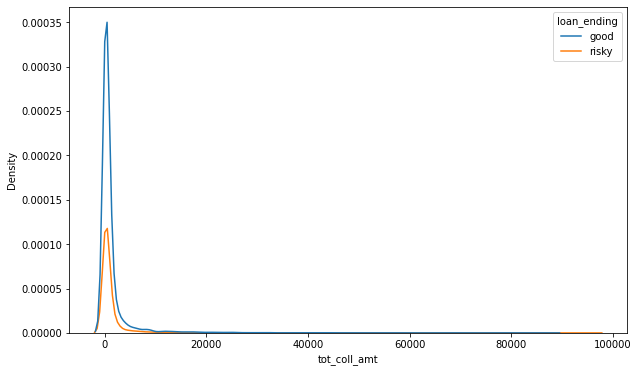

In [28]:
plt.figure(figsize=(10,6))

# Using "> 0" because 75% of the data is 0... so the plot below just use < 25% of the data
sns.kdeplot(data = data[(data['tot_coll_amt'] < 100000) & (data['tot_coll_amt'] > 0)], x='tot_coll_amt', hue='loan_ending')

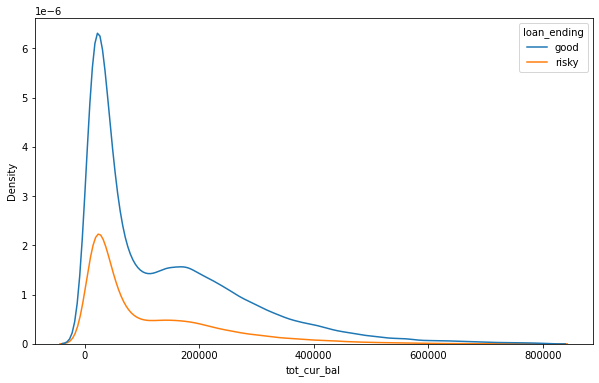

In [29]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data[data['tot_cur_bal'] < 800000], x='tot_cur_bal', hue='loan_ending')

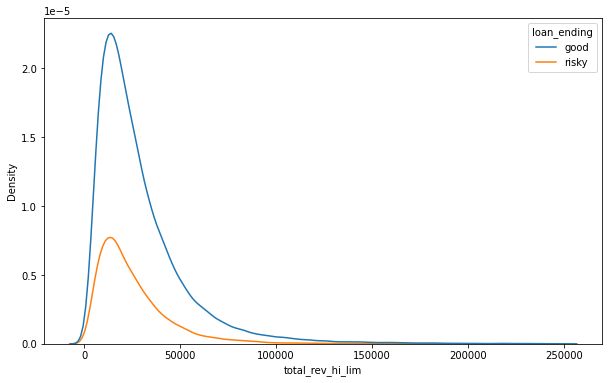

In [30]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data[data['total_rev_hi_lim'] < 250000], x='total_rev_hi_lim', hue='loan_ending')

In [31]:
drop_col = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

dropped_data = pd.concat([dropped_data, data[drop_col]], axis = 1)
data.drop(drop_col, inplace=True, axis = 1)

In [32]:
#Data with small unique value (less than 10 unique values)
data.nunique()[data.nunique() < 10].sort_values()

policy_code                   1
application_type              1
term                          2
initial_list_status           2
loan_ending                   2
major_derogatory              2
verification_status           3
home_ownership                6
acc_now_delinq                6
grade                         7
collections_12_mths_ex_med    7
dtype: int64

In [33]:
data.drop(['policy_code','application_type'], inplace=True, axis = 1)

In [34]:
#Create ratio
def risk_pct_chart(x):
    ratio = (data.groupby(x)['loan_ending'] # group by
         .value_counts(normalize=True) # calculate the ratio
         .mul(100) # multiply by 100 to be percent
         .rename('risky_pct') # rename column as percent
         .reset_index())

    sns.lineplot(data=ratio[ratio['loan_ending'] == 'risky'], x=x, y='risky_pct')
    plt.title(x)
    plt.show()

In [35]:
print(data.nunique()[data.nunique() < 10].sort_values().index)

Index(['term', 'initial_list_status', 'loan_ending', 'major_derogatory',
       'verification_status', 'home_ownership', 'acc_now_delinq', 'grade',
       'collections_12_mths_ex_med'],
      dtype='object')


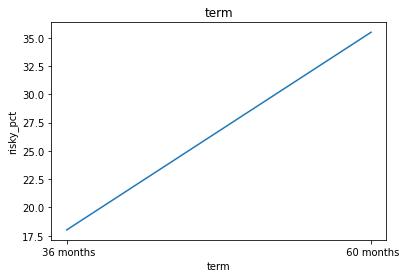

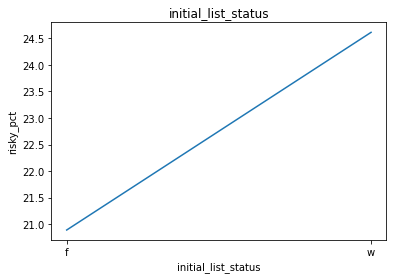

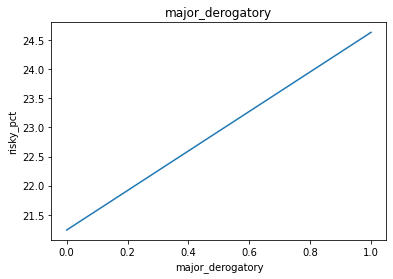

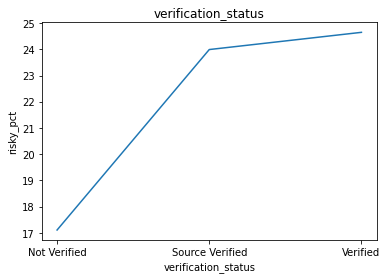

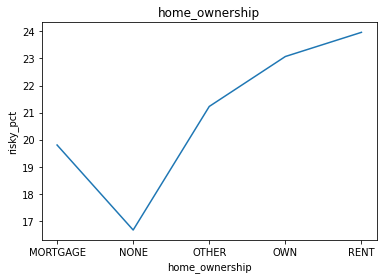

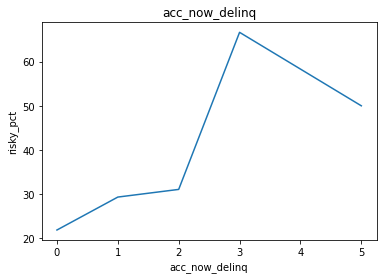

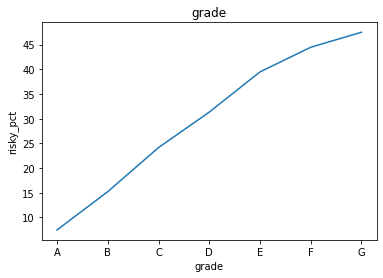

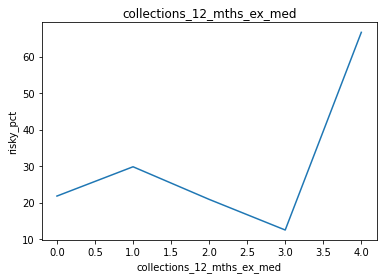

In [36]:
small_unique = ['term', 'initial_list_status', 'major_derogatory',
       'verification_status', 'home_ownership', 'acc_now_delinq', 'grade',
       'collections_12_mths_ex_med']

for cols in small_unique:
    risk_pct_chart(cols)

In [37]:
#cleaning with numerical and categorical data
# numerical
num_data = data.select_dtypes(exclude= 'object')
num_data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'major_derogatory'],
      dtype='object')

In [38]:
# categorical
cat_data = data.select_dtypes(include= 'object')
cat_data.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_credit_pull_d', 'loan_ending'],
      dtype='object')

In [39]:
cols = ['emp_length', 'earliest_cr_line', 'last_credit_pull_d']

cat_data[cols].head()

,emp_length,earliest_cr_line,last_credit_pull_d
0,10+ years,Jan-85,Jan-16
1,< 1 year,Apr-99,Sep-13
2,10+ years,Nov-01,Jan-16
3,10+ years,Feb-96,Jan-15
5,3 years,Nov-04,Sep-15


In [40]:
# Check unique value to map
data['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       nan], dtype=object)

In [41]:
emp_map = {
    '< 1 year' : '0',
    '1 year' : '1',
    '2 years' : '2',
    '3 years' : '3',
    '4 years' : '4',
    '5 years' : '5',
    '6 years' : '6',
    '7 years' : '7',
    '8 years' : '8',
    '9 years' : '9',
    '10+ years' : '10'
}

data['emp_length'] = data['emp_length'].map(emp_map).fillna('0').astype(int)
data['emp_length'].unique()

array([10,  0,  3,  9,  4,  5,  1,  6,  2,  7,  8])

In [42]:
# Pick just year from earliest credit line
data['earliest_cr_yr'] = pd.to_datetime(data['earliest_cr_line'], format = "%b-%y").dt.year

# calculate year since last inquiry
data['yr_since_last_inq'] = 2016 - pd.to_datetime(data['last_credit_pull_d'], format = "%b-%y").dt.year

data[['emp_length', 'earliest_cr_yr', 'yr_since_last_inq']].describe()

,emp_length,earliest_cr_yr,yr_since_last_inq
count,238913.000000,238884.000000,238890.000000
mean,5.566637,1997.710554,0.959149
std,3.716528,7.486129,1.162644
min,0.000000,1969.000000,0.000000
25%,2.000000,1994.000000,0.000000
50%,5.000000,1999.000000,1.000000
75%,10.000000,2002.000000,1.000000
max,10.000000,2068.000000,9.000000


In [45]:
#the latest credit line should be around 2014-2015.
data = data[data['earliest_cr_yr'] < 2016]

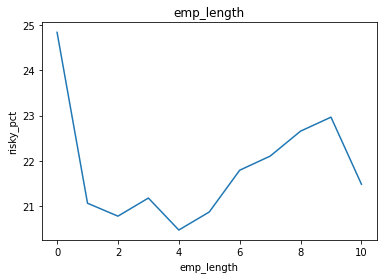

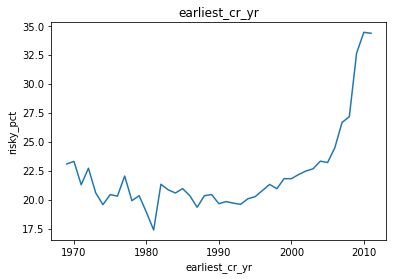

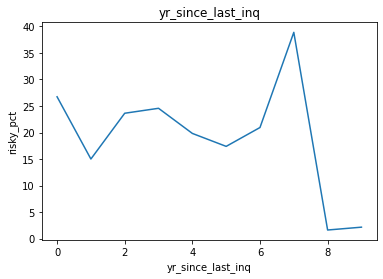

In [46]:
to_chart = ['emp_length', 'earliest_cr_yr', 'yr_since_last_inq']

for cols in to_chart:
    risk_pct_chart(cols)

In [47]:
to_drop = ['earliest_cr_line', 'last_credit_pull_d']
dropped_data = pd.concat([dropped_data, data[to_drop]], axis = 1)

# numerical
num_data = data.drop(to_drop, axis=1).select_dtypes(exclude= 'object')
print('num data: ', num_data.columns)

# categorical
cat_data = data.drop(to_drop, axis=1).select_dtypes(include= 'object')
print('cat data: ', cat_data.columns)



num data:  Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'major_derogatory', 'earliest_cr_yr',
       'yr_since_last_inq'],
      dtype='object')
cat data:  Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'initial_list_status', 'loan_ending'],
      dtype='object')


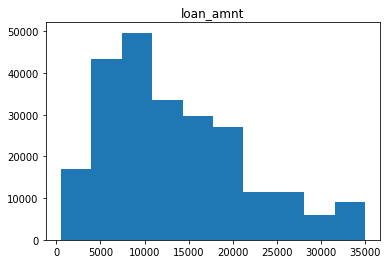

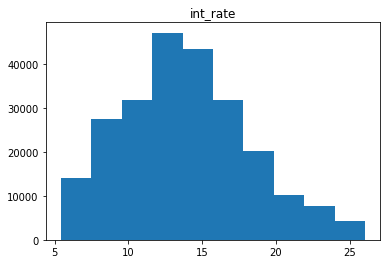

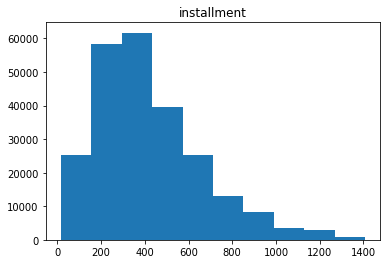

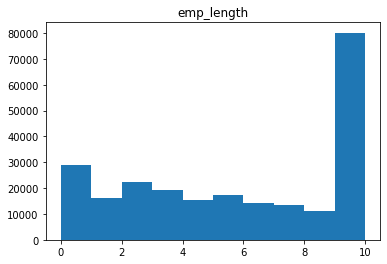

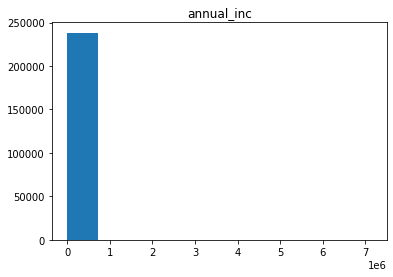

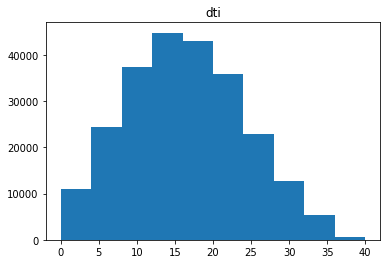

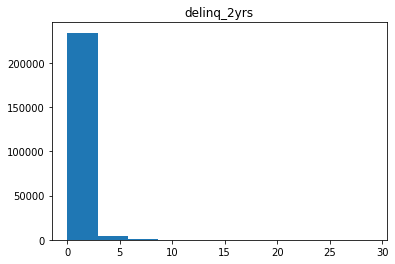

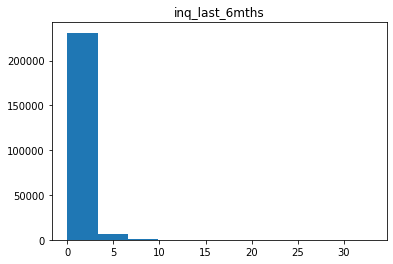

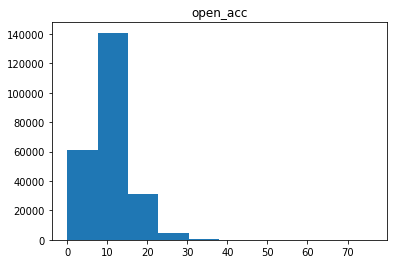

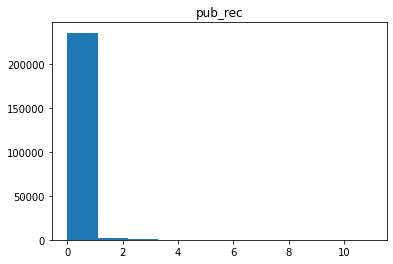

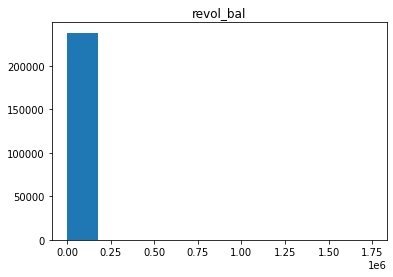

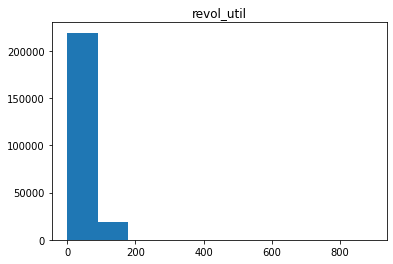

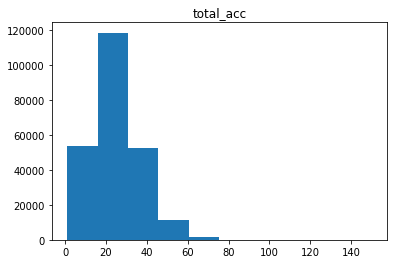

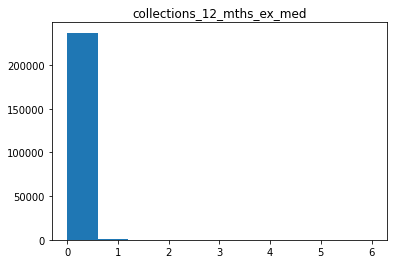

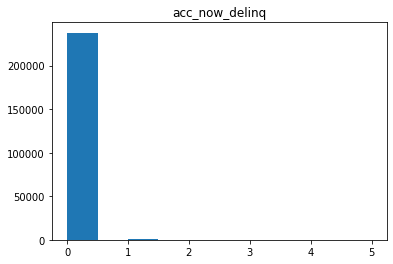

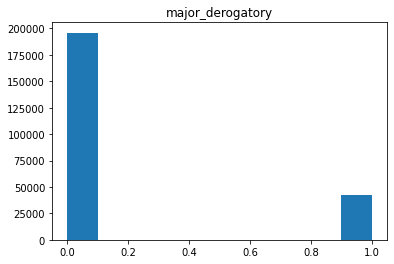

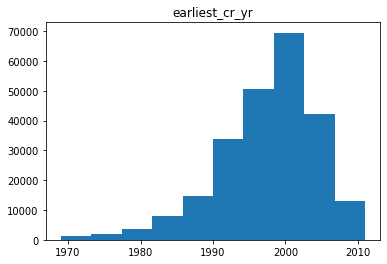

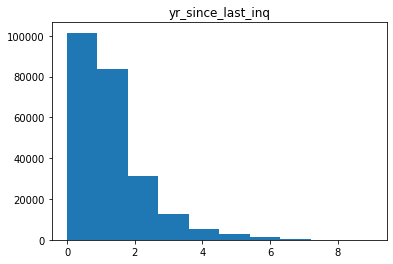

In [48]:
# Distribution
for i in num_data.columns:
    plt.hist(num_data[i])
    plt.title(i)
    plt.show()

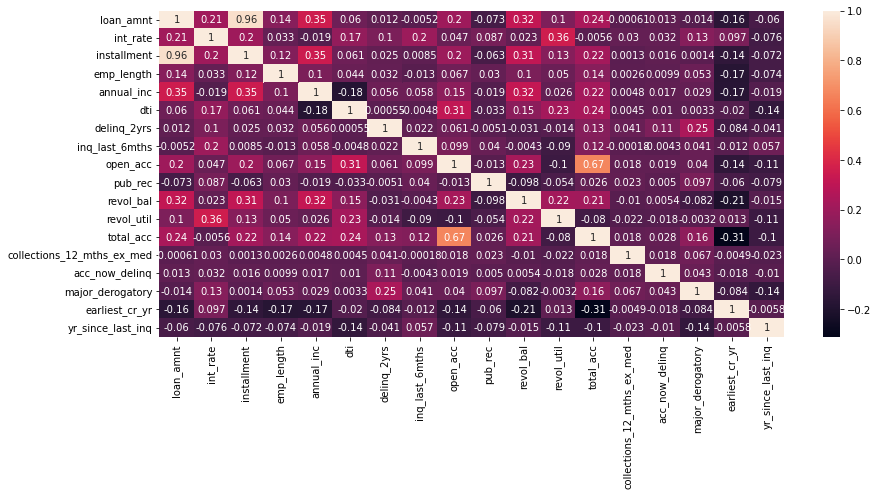

In [49]:
# Correlation
plt.figure(figsize=(14,6))
sns.heatmap(data=num_data.corr(), annot=True)

In [50]:
# Pivot table
pd.pivot_table(data, index = 'loan_ending', values = num_data.columns)

,acc_now_delinq,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,earliest_cr_yr,emp_length,inq_last_6mths,installment,int_rate,loan_amnt,major_derogatory,open_acc,pub_rec,revol_bal,revol_util,total_acc,yr_since_last_inq
loan_ending,,,,,,,,,,,,,,,,,,
good,0.002587,73686.164671,0.005412,0.236165,15.920096,1997.434908,5.587686,0.872580,409.768577,13.265707,13167.634542,0.171615,10.786252,0.130941,15235.640579,53.724019,24.938820,0.981661
risky,0.003959,65627.606648,0.007845,0.290986,18.304076,1998.026562,5.509495,1.029425,442.595120,15.976388,14624.669902,0.200788,11.113569,0.148318,15126.616048,59.599248,24.328407,0.874962


In [51]:
cat_data.nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              129725
home_ownership              6
verification_status         3
purpose                    14
title                   49819
zip_code                  875
addr_state                 50
initial_list_status         2
loan_ending                 2
dtype: int64

In [53]:
to_drop = ['zip_code', 'title', 'emp_title']
dropped_data = pd.concat([dropped_data, data[to_drop]], axis = 1) # It's my habit to collect dropped data

cat_data.drop(to_drop, axis=1, inplace=True)

In [54]:
cat_data.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'addr_state', 'initial_list_status', 'loan_ending'],
      dtype='object')

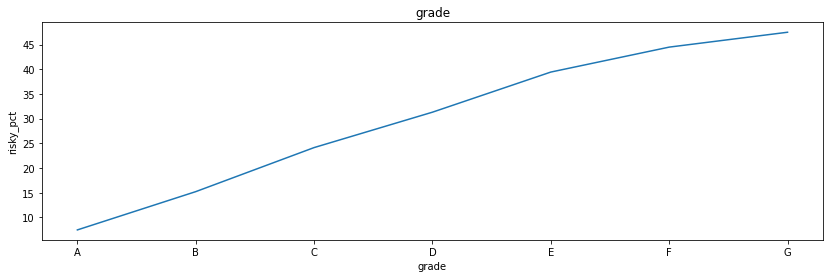

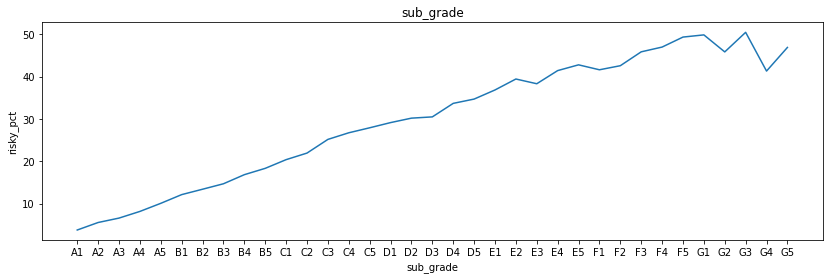

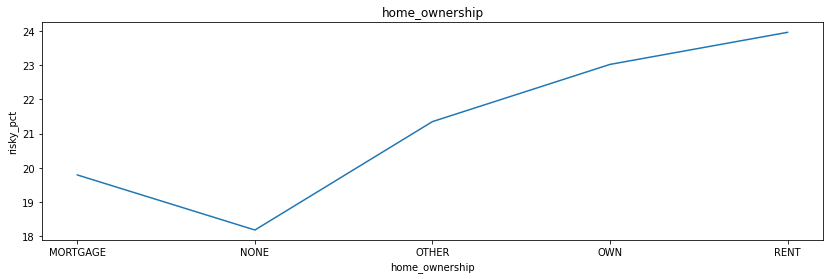

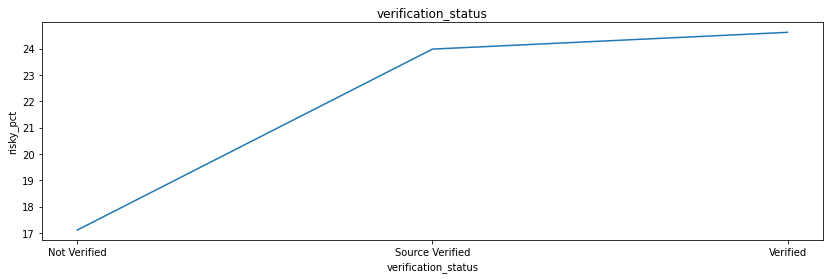

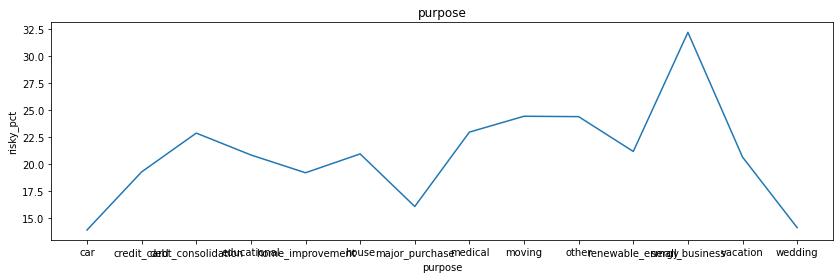

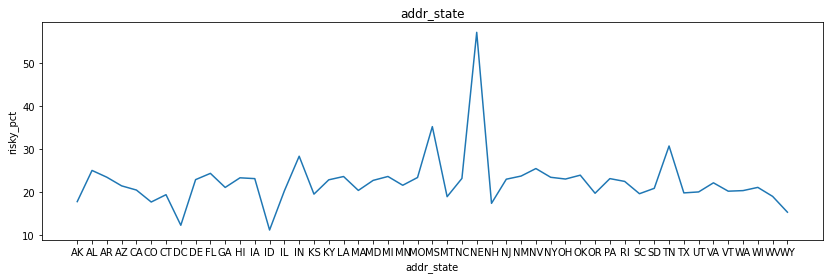

In [55]:
to_chart = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state']

for cols in to_chart:
    plt.figure(figsize=(14,4))
    risk_pct_chart(cols)

In [56]:
dropped_data = pd.concat([dropped_data, data['sub_grade']], axis = 1)
cat_data.drop('sub_grade', axis = 1, inplace=True)
cat_data.nunique()

term                    2
grade                   7
home_ownership          6
verification_status     3
purpose                14
addr_state             50
initial_list_status     2
loan_ending             2
dtype: int64

In [57]:
# Transforming 'term'
cat_data['term'] = cat_data['term'].str.replace(' months', '').astype(int)

In [58]:
cat_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [60]:
#transforming grade
grade_map = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
}

cat_data['grade'] = cat_data['grade'].map(grade_map)

In [61]:
# one hot encode
to_dummies = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status']

dummies = pd.get_dummies(cat_data[to_dummies])
dummies.drop('initial_list_status_w', axis=1, inplace=True)

In [62]:
dummies.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [63]:
# dropping columns that already one hot encoded
dropped_data = pd.concat([dropped_data, cat_data[to_dummies]], axis = 1)
cat_data.drop(to_dummies, axis=1, inplace=True)

In [64]:
# combining categorical data with one hot encoded data
cat_data_f = pd.concat([cat_data, dummies], axis = 1)

In [65]:
# combining numerical and categorical data
final_data = pd.concat([num_data, cat_data_f], axis = 1).dropna().reset_index().drop('index', axis = 1)
final_data.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f
0,5000,10.65,162.87,10,24000.0,27.65,0.0,1.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2500,15.27,59.83,0,30000.0,1.00,0.0,5.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2400,15.96,84.33,10,12252.0,8.72,0.0,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,10000,13.49,339.31,10,49200.0,20.00,0.0,1.0,10.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,5000,7.90,156.46,3,36000.0,11.20,0.0,3.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
# separate dependant (y) and independant (X) variable
X = final_data.drop('loan_ending', axis = 1)
y = final_data['loan_ending']

In [67]:
# splitting for training and model validation, it's important to avoid overfitting
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [68]:
# kaggle exclusive
kaggle_train_y = np.where(train_y == 'good', 1, 0)
kaggle_val_y = np.where(val_y == 'good', 1, 0)

In [69]:
# Modelng Section
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [70]:
pred_y = np.where(val_y == 'good',1,1)
print(classification_report(kaggle_val_y, pred_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12822
           1       0.78      1.00      0.88     46686

    accuracy                           0.78     59508
   macro avg       0.39      0.50      0.44     59508
weighted avg       0.62      0.78      0.69     59508



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
# Decision tree
dt = tree.DecisionTreeClassifier(random_state = 14)
dt.fit(train_X, kaggle_train_y)
pred_y = dt.predict(val_X)
print(classification_report(kaggle_val_y, pred_y))

              precision    recall  f1-score   support

           0       0.33      0.35      0.34     12822
           1       0.82      0.80      0.81     46686

    accuracy                           0.70     59508
   macro avg       0.57      0.57      0.57     59508
weighted avg       0.71      0.70      0.71     59508



In [73]:
# KNeirestNeighbor
knn = KNeighborsClassifier()
knn.fit(train_X, kaggle_train_y)
pred_y = knn.predict(val_X)
print(classification_report(kaggle_val_y, pred_y))

              precision    recall  f1-score   support

           0       0.28      0.11      0.16     12822
           1       0.79      0.92      0.85     46686

    accuracy                           0.75     59508
   macro avg       0.53      0.52      0.51     59508
weighted avg       0.68      0.75      0.70     59508



In [74]:
# Random Forest
rf = RandomForestClassifier(random_state = 14)
rf.fit(train_X, kaggle_train_y)
pred_y = rf.predict(val_X)
print(classification_report(kaggle_val_y, pred_y))

              precision    recall  f1-score   support

           0       0.61      0.12      0.21     12822
           1       0.80      0.98      0.88     46686

    accuracy                           0.79     59508
   macro avg       0.70      0.55      0.54     59508
weighted avg       0.76      0.79      0.74     59508



In [78]:
# XGB
xgb = XGBClassifier(random_state = 14)
xgb.fit(train_X, kaggle_train_y)
pred_y = xgb.predict(val_X)
print(classification_report(kaggle_val_y, pred_y))

              precision    recall  f1-score   support

           0       0.61      0.12      0.19     12822
           1       0.80      0.98      0.88     46686

    accuracy                           0.79     59508
   macro avg       0.70      0.55      0.54     59508
weighted avg       0.76      0.79      0.73     59508



In [79]:
# ensemble soft voting classifier
voting_clf = VotingClassifier(estimators = [('knn',knn),('rf',rf),('xgb',xgb)], voting = 'soft')
voting_clf.fit(train_X, kaggle_train_y)
pred_y = voting_clf.predict(val_X)
print(classification_report(kaggle_val_y, pred_y))

              precision    recall  f1-score   support

           0       0.59      0.06      0.12     12822
           1       0.79      0.99      0.88     46686

    accuracy                           0.79     59508
   macro avg       0.69      0.53      0.50     59508
weighted avg       0.75      0.79      0.72     59508

